Microsoft : Classifying Cybersecurity Incidents with Machine Learning

Load File Path:

In [1]:
train_file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Train.csv'


Basic View

In [5]:
import pandas as pd

# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(train_file_path, chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())


First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersio

 a. Data Exploration

Processing chunk 1...
Missing values in each column (First Chunk):
MitreTechniques      287358
IncidentGrade          2656
ActionGrouped        497090
ActionGranular       497090
EmailClusterId       494834
ThreatFamily         496080
ResourceType         499597
Roles                488662
AntispamDirection    490840
SuspicionLevel       424220
LastVerdict          382919
dtype: int64
Distribution of target variable 'IncidentGrade' (First Chunk):
IncidentGrade
BenignPositive    215445
TruePositive      174991
FalsePositive     106908
Name: count, dtype: int64


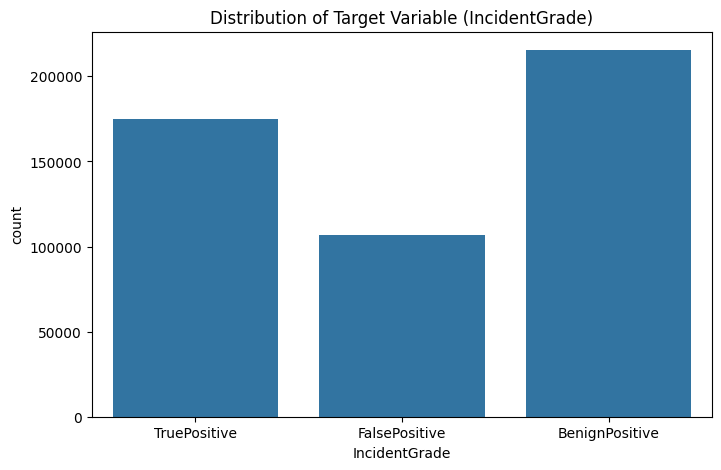

Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Combined Descriptive Statistics for Numeric Columns (averaged):
Id                    6.165253e+04
OrgId                 6.034231e+04
IncidentId            1.703026e+05
AlertId               4.969527e+05
DetectorId            6.073837e+04
AlertTitle            6.027770e+04
DeviceId              1.228830e+05
Sha256                1.489539e+05
IpAddress             2.931559e+05
Url                   1.631577e+05
AccountSid            3.450354e+05
AccountUpn            4.180538e+05
AccountObjectId       3.350238e+05
AccountName           3.524456e+05
DeviceName       

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Train.csv'
chunk_size = 500000  # Adjust based on system capacity

# Data loading with chunking and optimized data types
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Initialize accumulators for descriptive statistics and correlations
desc_stats_accum = pd.DataFrame()
correlations_accum = pd.DataFrame()

# Read data in chunks
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)

for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i+1}...")

    # Descriptive statistics for numeric columns in the current chunk
    numeric_columns = chunk.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    desc_stats = numeric_columns.describe()

    # Accumulate descriptive statistics by summing up
    desc_stats_accum = pd.concat([desc_stats_accum, desc_stats])

    # Correlation matrix for numeric columns in the current chunk
    correlations = numeric_columns.corr()

    # Accumulate correlations
    correlations_accum = correlations_accum.add(correlations, fill_value=0)

    # Check for missing values (in the first chunk for simplicity)
    if i == 0:
        missing_values = chunk.isnull().sum()
        print("Missing values in each column (First Chunk):")
        print(missing_values[missing_values > 0])

        # Distribution of the target variable
        print("Distribution of target variable 'IncidentGrade' (First Chunk):")
        print(chunk['IncidentGrade'].value_counts())

        # Visualizing the target variable distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(x='IncidentGrade', data=chunk)
        plt.title('Distribution of Target Variable (IncidentGrade)')
        plt.show()

# Average out the accumulated correlations to get the final correlation matrix
final_correlation_matrix = correlations_accum / (i + 1)

# Output combined results
print("Combined Descriptive Statistics for Numeric Columns (averaged):")
print(desc_stats_accum.mean())

print("\nFinal Correlation Matrix for Numeric Columns (averaged):")
print(final_correlation_matrix)



In [4]:
import pandas as pd

# Load the dataset without specifying dtypes
test_data = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Train.csv')

# Display the column names
print("Column Names in the Dataset:")
print(test_data.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(test_data.info())

# Preview the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(test_data.head())


Column Names in the Dataset:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id  

In [2]:
import pandas as pd

# Load the dataset without specifying dtypes
test_data = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Test.csv')

# Display the column names
print("Column Names in the Dataset:")
print(test_data.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(test_data.info())

# Preview the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(test_data.head())


C:\Users\sripathi\AppData\Local\Temp\ipykernel_5948\2754681328.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Test.csv')


Column Names in the Dataset:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  


b. Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# File path and chunk size
file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Train.csv'
chunk_size = 500000

# Data types dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(chunks, ignore_index=True)

# Handling Missing Data
threshold = len(df) * 0.8
df = df.dropna(thresh=threshold, axis=1)  # Drop columns with more than 80% missing values
df.fillna(method='ffill', inplace=True)   # Forward fill for remaining missing values

# Feature Engineering: Extracting datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)

# Normalizing Numerical Variables
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Encoding Categorical Variables using Label Encoding
label_encoder = LabelEncoder()

# List of categorical columns to encode (modify according to your needs)
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
                       'SuspicionLevel', 'MitreTechniques', 'ThreatFamily', 
                       'ResourceType', 'Roles', 'AntispamDirection', 'LastVerdict']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary

# Save processed data to CSV
df.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\processed_data.csv', index=False)
print("Data preprocessing complete and saved to 'processed_data.csv'.")


C:\Users\sripathi\AppData\Local\Temp\ipykernel_9592\2641832860.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # Forward fill for remaining missing values


Data preprocessing complete and saved to 'processed_data.csv'.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# File path and chunk size
file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\GUIDE_Test.csv'
chunk_size = 500000

# Data types dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(chunks, ignore_index=True)
# Handling Missing Data
threshold = len(df) * 0.8
df = df.dropna(thresh=threshold, axis=1)  # Drop columns with more than 80% missing values
df.fillna(method='ffill', inplace=True)   # Forward fill for remaining missing values

# Feature Engineering: Extracting datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Drop the 'Timestamp' column and extra 'Usage' Column
df.drop(columns=['Timestamp','Usage'], inplace=True)

# Normalizing Numerical Variables
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Encoding Categorical Variables using Label Encoding
label_encoder = LabelEncoder()

# List of categorical columns to encode (modify according to your needs)
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
                       'SuspicionLevel', 'MitreTechniques', 'ThreatFamily', 
                       'ResourceType', 'Roles', 'AntispamDirection', 'LastVerdict']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary

# Save processed data to CSV
df.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\Test_data.csv', index=False)
print("Data preprocessing complete and saved to 'Test_data.csv'.")

C:\Users\sripathi\AppData\Local\Temp\ipykernel_9084\292178004.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # Forward fill for remaining missing values


Data preprocessing complete and saved to 'Test_data.csv'.


c. Data Splitting

1) Stratified Sampling

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Load the dataset in chunks
file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\processed_data.csv'
chunksize = 100000  # Adjust based on memory availability
target_column = 'IncidentGrade'

# Stratified sampling to ensure representative sample
sampled_data = pd.DataFrame()
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    sampled_data = pd.concat([sampled_data, chunk.sample(frac=0.2, random_state=42)])

# Save stratified sample
output_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\sampled_data.csv'
sampled_data.to_csv(output_path, index=False)
print("Stratified sample saved to:", output_path)


Stratified sample saved to: D:\Guvi\projects\Microsoft_Cybersecurity\sampled_data.csv


2) Train-Validation Split

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load stratified sampled data
sampled_file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\sampled_data.csv'
df = pd.read_csv(sampled_file_path)

# Train-validation split with stratification
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Save the train and validation sets
X_train.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv', index=False)
y_train.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv', index=False)
X_val.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv', index=False)
y_val.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv', index=False)

print("Train and validation sets created and saved.")


Train and validation sets created and saved.


Overview

In [7]:
import pandas as pd 

# Load train and validation sets
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv')
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv')

# Check the types of data in your datasets
print(X_train.dtypes)
print(X_val.dtypes)
print(y_train.dtypes)
print(y_val.dtypes)

# Display the first few rows of each dataset to inspect the data
print(X_train.head())
print(X_val.head())
print(y_train.head())
print(y_val.head())


Id                    float64
OrgId                 float64
IncidentId            float64
AlertId               float64
DetectorId            float64
AlertTitle            float64
Category                int64
EntityType              int64
EvidenceRole            int64
DeviceId              float64
Sha256                float64
IpAddress             float64
Url                   float64
AccountSid            float64
AccountUpn            float64
AccountObjectId       float64
AccountName           float64
DeviceName            float64
NetworkMessageId      float64
RegistryKey           float64
RegistryValueName     float64
RegistryValueData     float64
ApplicationId         float64
ApplicationName       float64
OAuthApplicationId    float64
FileName              float64
FolderPath            float64
ResourceIdName        float64
OSFamily              float64
OSVersion             float64
CountryCode           float64
State                 float64
City                  float64
Year      

d. Model Selection and Training

Baseline Models

1) Logistic Regression

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import time
import psutil
import os

# Load train and validation sets
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv')
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv')

# Initialize logistic regression with default parameters
logreg = LogisticRegression(max_iter=100, solver='liblinear')

# Train model with cross-validation and time tracking
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
y_pred = logreg.predict(X_val)

# Print results
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.67    165417
           1       0.59      0.18      0.27     81644
           2       0.64      0.67      0.66    133613

    accuracy                           0.61    380674
   macro avg       0.61      0.54      0.53    380674
weighted avg       0.61      0.61      0.58    380674

Confusion Matrix:
[[128708   6156  30553]
 [ 47701  14359  19584]
 [ 39798   3873  89942]]
Training Time: 208.95 seconds
Memory Usage: 606.41 MB


2) Decision Tree

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time
import psutil
import os

# Load train and validation sets
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv')
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv')

# Initialize decision tree classifier with default parameters
dtree = DecisionTreeClassifier()

# Set up the parameter grid with limited complexity for faster training
param_grid = {
    'max_depth': [5, 10],  # Limit max depth for faster training
    'min_samples_split': [10, 20],  # Larger splits to speed up training
    'min_samples_leaf': [5, 10]  # Larger leaf size to speed up training
}

# Use StratifiedKFold for better class distribution in splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Fewer folds for faster training

# Perform grid search with cross-validation (reduce n_jobs if you're experiencing memory issues)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get best estimator after GridSearch
best_dtree = grid_search.best_estimator_

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Predict on validation set using the best model found by GridSearch
y_pred = best_dtree.predict(X_val)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80    165417
           1       0.78      0.65      0.71     81644
           2       0.94      0.72      0.82    133613

    accuracy                           0.79    380674
   macro avg       0.81      0.76      0.78    380674
weighted avg       0.81      0.79      0.79    380674

Confusion Matrix:
[[150930  10111   4376]
 [ 27060  52963   1621]
 [ 31871   5185  96557]]
Training Time: 2022.88 seconds
Memory Usage: 460.22 MB


Advanced Models

1) Random Forest

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from joblib import parallel_backend  # Updated to use joblib instead of parallel_backend
import time
import psutil
import os

# Load prepared data
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv').squeeze()
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv').squeeze()

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Define optimized parameter grid for randomized search (updated to remove 'auto')
param_dist = {
    'n_estimators': [100, 200],    # Number of trees in the forest
    'max_depth': [5, 10],          # Maximum depth of the tree
    'max_features': ['sqrt', 'log2'],  # Removed 'auto', updated to use valid options
    'min_samples_split': [2, 5],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]     # Whether bootstrap samples are used when building trees
}

# Setup randomized search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=5,  # Adjust as needed for faster or more extensive search
    cv=cv, 
    scoring='f1_macro', 
    n_jobs=-1, 
    random_state=42
)

# Train model with randomized search and time tracking
start_time = time.time()

# Use joblib for parallel processing
with parallel_backend('loky'):
    random_search.fit(X_train, y_train)

end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
Rand_Forest = random_search.best_estimator_
y_pred = Rand_Forest.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80    165417
           1       0.95      0.53      0.68     81644
           2       0.97      0.69      0.80    133613

    accuracy                           0.78    380674
   macro avg       0.86      0.73      0.76    380674
weighted avg       0.83      0.78      0.77    380674

Confusion Matrix:
[[161826   1671   1920]
 [ 37266  42996   1382]
 [ 40891    793  91929]]
Training Time: 1552.54 seconds
Memory Usage: 473.63 MB


2) Gradient Boosting Machines - XGBoost

In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import parallel_backend
import time
import psutil
import os
from functools import partial

# Load prepared data
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv').squeeze()
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv').squeeze()

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define optimized parameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200],  # Focused range
    'max_depth': [3, 6],         # Reduced options
    'learning_rate': [0.05, 0.1],# Typical effective rates
    'subsample': [0.8, 1.0],     # Practical values
    'colsample_bytree': [0.8, 1.0] # Keep similar subsampling for features
}

# Create a custom fit method with the additional parameters
fit_with_early_stopping = partial(
    xgb_model.fit,
    early_stopping_rounds=10,
    eval_set=[(X_val, y_val)],
    verbose=0
)

xgb_model.fit = fit_with_early_stopping

# Setup randomized search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=5,  # Fewer iterations for faster search
    cv=cv, 
    scoring='f1_macro', 
    n_jobs=-1, 
    random_state=42
)

# Train model with randomized search and time tracking
start_time = time.time()
with parallel_backend('loky'):
    random_search.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
XG_Boost = random_search.best_estimator_
y_pred = XG_Boost.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:39:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91    165417
           1       0.93      0.81      0.86     81644
           2       0.94      0.89      0.91    133613

    accuracy                           0.90    380674
   macro avg       0.91      0.88      0.89    380674
weighted avg       0.90      0.90      0.90    380674

Confusion Matrix:
[[158375   3275   3767]
 [ 12250  65986   3408]
 [ 13130   1976 118507]]
Training Time: 1155.97 seconds
Memory Usage: 621.88 MB


3) Gradient Boosting Machines - LightGBM

In [1]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import parallel_backend
import time
import psutil
import os

# Load prepared data
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv').squeeze()
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv').squeeze()

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Define parameter grid for random search
param_dist = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'num_leaves': [31, 50]}

# Setup random search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=5, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)

# Train model with random search and time tracking
start_time = time.time()
with parallel_backend('loky'):
    random_search.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
LGBM = random_search.best_estimator_
y_pred = LGBM.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3799
[LightGBM] [Info] Number of data points in the train set: 1522693, number of used features: 37
[LightGBM] [Info] Start training from score -0.833475
[LightGBM] [Info] Start training from score -1.539579
[LightGBM] [Info] Start training from score -1.046992
Best Hyperparameters: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    165417
           1       0.94      0.89      0.91     81644
           2       0.96      0.94      0.95    133613

    accuracy                           0.94    380674
   macro avg       0.94      0.93      0.94    380674
weighted avg       0.94      0.94      0.94    380

4) Neural Networks

In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time
import psutil
import os

# Load prepared data (already normalized and encoded)
X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv')
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv').squeeze()
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv')
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv').squeeze()

# Initialize a simple neural network
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(X_train.shape[1])

# Set up early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

# Train the model with early stopping and time tracking
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Start with fewer epochs
    batch_size=32,  # Smaller batch size for quicker updates
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Print results
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47585/47585 - 91s - 2ms/step - accuracy: 0.3305 - loss: -1.1022e+04 - val_accuracy: 0.3423 - val_loss: -3.1868e+04 - learning_rate: 0.0010
Epoch 2/50
47585/47585 - 88s - 2ms/step - accuracy: 0.3362 - loss: -7.1488e+04 - val_accuracy: 0.3479 - val_loss: -1.2992e+05 - learning_rate: 0.0010
Epoch 3/50
47585/47585 - 87s - 2ms/step - accuracy: 0.3366 - loss: -1.8812e+05 - val_accuracy: 0.3640 - val_loss: -2.8922e+05 - learning_rate: 0.0010
Epoch 4/50
47585/47585 - 87s - 2ms/step - accuracy: 0.3368 - loss: -3.6101e+05 - val_accuracy: 0.3366 - val_loss: -4.7998e+05 - learning_rate: 0.0010
Epoch 5/50
47585/47585 - 89s - 2ms/step - accuracy: 0.3389 - loss: -5.9245e+05 - val_accuracy: 0.3721 - val_loss: -7.3963e+05 - learning_rate: 0.0010
Epoch 6/50
47585/47585 - 86s - 2ms/step - accuracy: 0.3407 - loss: -8.8068e+05 - val_accuracy: 0.2730 - val_loss: -1.0875e+06 - learning_rate: 0.0010
Epoch 7/50
47585/47585 - 88s - 2ms/step - accuracy: 0.3407 - loss: -1.2209e+06 - val_accuracy: 0.333

c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.81      0.43      0.56    165417
           1       0.24      0.85      0.37     81644
           2       0.00      0.00      0.00    133613

    accuracy                           0.37    380674
   macro avg       0.35      0.43      0.31    380674
weighted avg       0.40      0.37      0.32    380674

Confusion Matrix:
[[ 71590  93827      0]
 [ 12520  69124      0]
 [  4226 129387      0]]
Training Time: 5519.01 seconds
Memory Usage: 332.08 MB


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


e. Model Evaluation and Tuning 

1) Comparison on Advanced Models

Comparison Table:
         Model  Accuracy  Macro-F1 Score  Precision (Macro)  Recall (Macro)  Training Time (s)  Memory Usage (MB)
 Random Forest      0.78            0.76               0.86            0.73            1552.54             473.63
       XGBoost      0.90            0.89               0.91            0.88            1155.97             621.88
      LightGBM      0.94            0.94               0.94            0.93            1468.18             479.51
Neural Network      0.37            0.31               0.35            0.43            5519.01             332.08

Best Model Based on Macro-F1 Score:
Model                LightGBM
Accuracy                 0.94
Macro-F1 Score           0.94
Precision (Macro)        0.94
Recall (Macro)           0.93
Training Time (s)     1468.18
Memory Usage (MB)      479.51
Name: 2, dtype: object


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10896\1448887120.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
C:\Users\sripathi\AppData\Local\Temp\ipykernel_10896\1448887120.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis')
C:\Users\sripathi\AppData\Local\Temp\ipykernel_10896\1448887120.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis')
C:\Users\sripathi\AppD

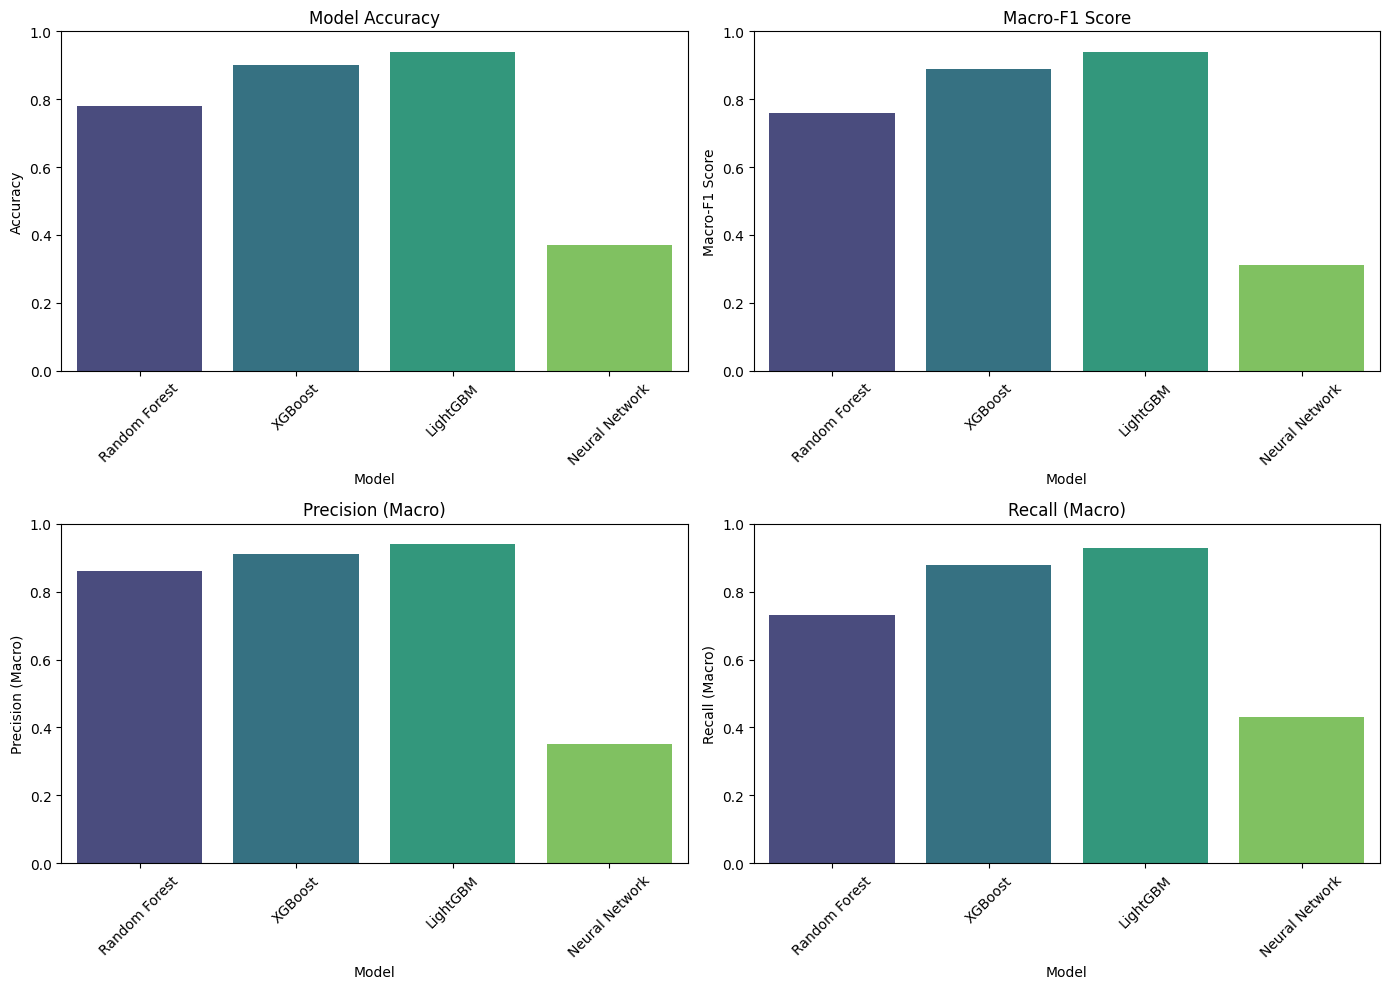

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for comparison
data = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Neural Network'],
    'Accuracy': [0.78, 0.90, 0.94, 0.37],
    'Macro-F1 Score': [0.76, 0.89, 0.94, 0.31],
    'Precision (Macro)': [0.86, 0.91, 0.94, 0.35],
    'Recall (Macro)': [0.73, 0.88, 0.93, 0.43],
    'Training Time (s)': [1552.54, 1155.97, 1468.18, 5519.01],
    'Memory Usage (MB)': [473.63, 621.88, 479.51, 332.08]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis')
plt.title('Macro-F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis')
plt.title('Precision (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall (Macro)', data=df, palette='viridis')
plt.title('Recall (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()


2) Selected Advanced Model - LightGBM with Hyperparameter Tuning and Class Imbalance Handling

2) a Handling Imbalance 

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load prepared data with optimized data types to reduce memory usage
dtypes = {
    'Id': 'float64', 'OrgId': 'float64', 'IncidentId': 'float64', 'AlertId': 'float64', 
    'DetectorId': 'float64', 'AlertTitle': 'float64', 'Category': 'int64', 'EntityType': 'int64', 
    'EvidenceRole': 'int64', 'DeviceId': 'float64', 'Sha256': 'float64', 'IpAddress': 'float64', 
    'Url': 'float64', 'AccountSid': 'float64', 'AccountUpn': 'float64', 'AccountObjectId': 'float64', 
    'AccountName': 'float64', 'DeviceName': 'float64', 'NetworkMessageId': 'float64', 'RegistryKey': 'float64', 
    'RegistryValueName': 'float64', 'RegistryValueData': 'float64', 'ApplicationId': 'float64', 
    'ApplicationName': 'float64', 'OAuthApplicationId': 'float64', 'FileName': 'float64', 'FolderPath': 'float64', 
    'ResourceIdName': 'float64', 'OSFamily': 'float64', 'OSVersion': 'float64', 'CountryCode': 'float64', 
    'State': 'float64', 'City': 'float64', 'Year': 'float64', 'Month': 'float64', 'DayOfWeek': 'float64', 
    'Hour': 'float64'
}

X_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train.csv', dtype=dtypes)
y_train = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train.csv', dtype='int8').squeeze()

# Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Save the resampled data to CSV
X_train_resampled.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train_resampled.csv', index=False)
y_train_resampled.to_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train_resampled.csv', index=False)


2) b LightGBM with Hyperparameter Tuning

In [5]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import time
import psutil
import os

# Load resampled data
X_train_resampled = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_train_resampled.csv')
y_train_resampled = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_train_resampled.csv').squeeze()
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv', dtype=dtypes)
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv', dtype='int8').squeeze()

# Initialize LightGBM classifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', random_state=42, n_jobs=-1)

# Define parameter grid for random search
param_dist = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.05, 0.1], 
    'num_leaves': [31, 50]
}

# Setup random search with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    lgbm, 
    param_distributions=param_dist, 
    n_iter=5, 
    cv=cv, 
    scoring='f1_macro', 
    n_jobs=-1, 
    random_state=42
)

# Train model with random search and time tracking
start_time = time.time()
random_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
Selected_Best_Model = random_search.best_estimator_
y_pred = Selected_Best_Model.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.607914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4255
[LightGBM] [Info] Number of data points in the train set: 1984998, number of used features: 37
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94    165417
           1       0.90      0.91      0.91     81644
           2       0.95      0.94      0.95    133613

    accuracy                           0.94    380674
   macro avg       0.93      0.93      0.93    380674
weighted avg       0.94      0.94      0.94    380

In [9]:
from joblib import dump

# Save the trained model
dump(Selected_Best_Model, 'best_lightgbm_model.joblib')


['best_lightgbm_model.joblib']

f. Model Interpretation

Calculating LightGBM Built-in Feature Importance...
Top 10 Important Features:
       Feature  Importance
1        OrgId        8364
0           Id        5293
4   DetectorId        2879
2   IncidentId        2594
3      AlertId        2488
5   AlertTitle        2036
6     Category        1267
36        Hour        1253
35   DayOfWeek         973
14  AccountUpn         314


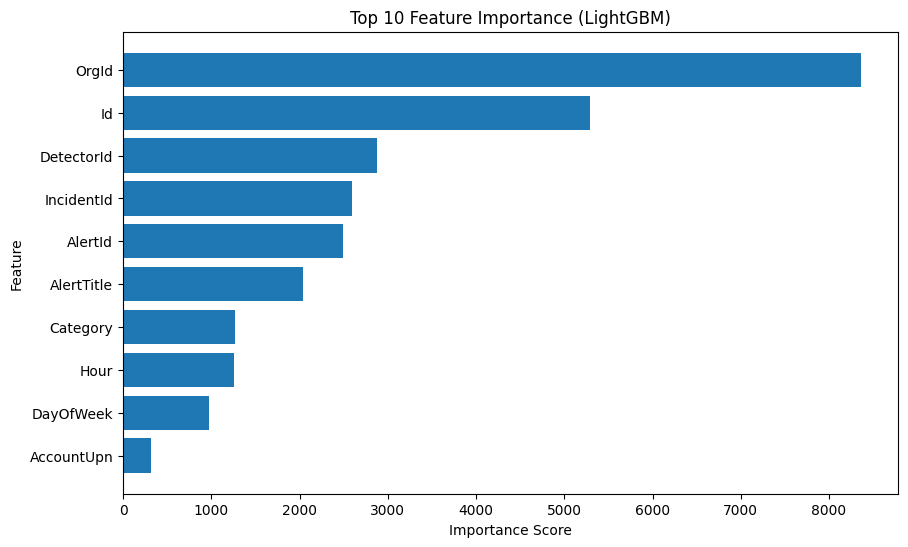

Number of misclassifications: 23987
Sample misclassified cases:
          Id     OrgId  IncidentId   AlertId  DetectorId  AlertTitle  \
1  -1.216203 -0.311755    0.950542 -0.150667   -0.242867   -0.145578   
21 -1.262117  1.536849    1.967119  0.685439   -0.247464    0.376872   
51  0.877044  0.148457    0.841461  1.236211   -0.254359   -0.151297   
54  1.366791  2.837336   -0.515170 -0.784562    3.832023   -0.137277   
76  1.479488 -0.446199   -0.404938 -0.747565   -0.231376   -0.149821   

    Category  EntityType  EvidenceRole  DeviceId  ...  ResourceIdName  \
1         16          32             0  0.191663  ...        0.027967   
21        16          19             0 -4.870749  ...        0.027967   
51        10           7             1  0.191663  ...        0.027967   
54        13          32             0  0.191663  ...        0.027967   
76        10          11             1  0.191663  ...        0.027967   

    OSFamily  OSVersion  CountryCode     State      City      Ye

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import load

# Load resampled data
dtypes = {
    'Id': 'float64', 'OrgId': 'float64', 'IncidentId': 'float64', 'AlertId': 'float64', 
    'DetectorId': 'float64', 'AlertTitle': 'float64', 'Category': 'int64', 'EntityType': 'int64', 
    'EvidenceRole': 'int64', 'DeviceId': 'float64', 'Sha256': 'float64', 'IpAddress': 'float64', 
    'Url': 'float64', 'AccountSid': 'float64', 'AccountUpn': 'float64', 'AccountObjectId': 'float64', 
    'AccountName': 'float64', 'DeviceName': 'float64', 'NetworkMessageId': 'float64', 'RegistryKey': 'float64', 
    'RegistryValueName': 'float64', 'RegistryValueData': 'float64', 'ApplicationId': 'float64', 
    'ApplicationName': 'float64', 'OAuthApplicationId': 'float64', 'FileName': 'float64', 'FolderPath': 'float64', 
    'ResourceIdName': 'float64', 'OSFamily': 'float64', 'OSVersion': 'float64', 'CountryCode': 'float64', 
    'State': 'float64', 'City': 'float64', 'Year': 'float64', 'Month': 'float64', 'DayOfWeek': 'float64', 
    'Hour': 'float64'
}
X_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\X_val.csv', dtype=dtypes)
y_val = pd.read_csv(r'D:\Guvi\projects\Microsoft_Cybersecurity\y_val.csv', dtype='int8').squeeze()

# Load the trained model
Selected_Best_Model = load('best_lightgbm_model.joblib')

# Evaluate the model
y_pred = Selected_Best_Model.predict(X_val)

# Calculate feature importance
print("Calculating LightGBM Built-in Feature Importance...")
feature_importances = Selected_Best_Model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_val.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('Top 10 Feature Importance (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Error Analysis
misclassified_indices = np.where(y_pred != y_val)[0]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassifications: {num_misclassified}")
print("Sample misclassified cases:")
print(X_val.iloc[misclassified_indices].head())

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


g. Final Evaluation on Test Set

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from joblib import load

# Load the saved model
best_model_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\best_lightgbm_model.joblib'
loaded_model = load(best_model_path)

# Load the test dataset
test_file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\Test_data.csv'
df_test = pd.read_csv(test_file_path)

# Prepare test data
X_test = df_test.drop(columns=['IncidentGrade'])
y_test = df_test['IncidentGrade']

# Make predictions using the loaded model
y_test_pred = loaded_model.predict(X_test)

# Calculate and print the evaluation metrics
print("Test Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Test Set Results:
Macro-F1 Score: 0.6004
Macro Precision: 0.6638
Macro Recall: 0.6418

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.42      0.56   1752940
           1       0.38      0.85      0.52    902698
           2       0.80      0.66      0.72   1492354

    accuracy                           0.60   4147992
   macro avg       0.66      0.64      0.60   4147992
weighted avg       0.71      0.60      0.61   4147992

Confusion Matrix (Test Set):
[[740440 781046 231454]
 [124766 764380  13552]
 [ 47496 465365 979493]]


Baseline model - Logestic regression on Test Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import time
import psutil
import os

# Load stratified sampled data
sampled_file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\Test_data.csv'
df = pd.read_csv(sampled_file_path)

# Train-validation split with stratification
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression with default parameters
logreg = LogisticRegression(max_iter=100, solver='liblinear')

# Train model with time tracking
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model on validation data
y_pred = logreg.predict(X_val)

# Print results
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66    350403
           1       0.56      0.26      0.36    180282
           2       0.67      0.69      0.68    298914

    accuracy                           0.62    829599
   macro avg       0.61      0.57      0.57    829599
weighted avg       0.61      0.62      0.60    829599

Confusion Matrix:
[[260723  27257  62423]
 [ 91632  47709  40941]
 [ 83023   9919 205972]]
Training Time: 958.37 seconds
Memory Usage: 5.88 MB


Baseline Model - Decision Tree on Test Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time
import psutil
import os

# Load stratified sampled data
sampled_file_path = r'D:\Guvi\projects\Microsoft_Cybersecurity\Test_data.csv'
df = pd.read_csv(sampled_file_path)

# Train-validation split with stratification
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier with default parameters
dtree = DecisionTreeClassifier()

# Set up the parameter grid with limited complexity for faster training
param_grid = {
    'max_depth': [5, 10],  # Limit max depth for faster training
    'min_samples_split': [10, 20],  # Larger splits to speed up training
    'min_samples_leaf': [5, 10]  # Larger leaf size to speed up training
}

# Perform grid search with cross-validation (reduce n_jobs if you're experiencing memory issues)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get the best estimator after GridSearch
best_dtree = grid_search.best_estimator_

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Predict on validation set using the best model found by GridSearch
y_pred = best_dtree.predict(X_val)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sripa

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.96      0.80    350403
           1       0.91      0.57      0.70    180282
           2       0.96      0.73      0.83    298914

    accuracy                           0.79    829599
   macro avg       0.85      0.75      0.78    829599
weighted avg       0.83      0.79      0.79    829599

Confusion Matrix:
[[337146   8044   5213]
 [ 74915 102383   2984]
 [ 78769   2539 217606]]
Training Time: 6160.56 seconds
Memory Usage: 984.58 MB


Comparison of Base line Model with advanced model 

Comparison of Model Performance:
                 Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0  Logistic Regression      0.62                 0.61              0.57   
1        Decision Tree      0.79                 0.85              0.75   
2             LightGBM      0.60                 0.66              0.64   

   Macro Avg F1-Score  Training Time (s)  Memory Usage (MB)  
0                0.57             958.37               5.88  
1                0.78            6160.56             984.58  
2                0.60                NaN                NaN  


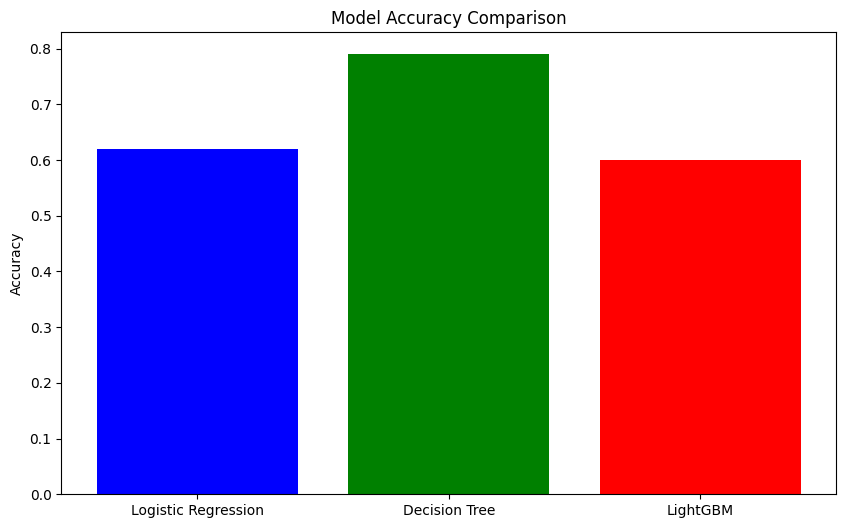

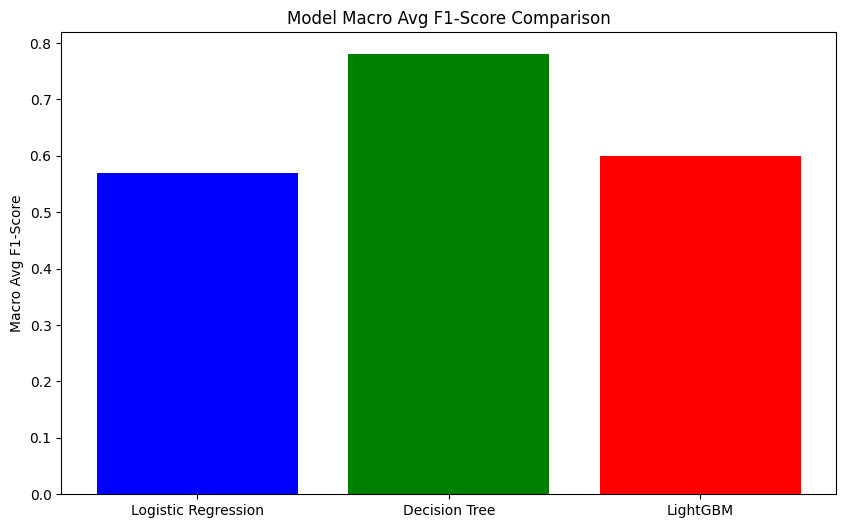

In [1]:
import pandas as pd
import numpy as np

# Classification reports as dictionaries for easier manipulation
logistic_regression_report = {
    "precision": [0.60, 0.56, 0.67],
    "recall": [0.74, 0.26, 0.69],
    "f1-score": [0.66, 0.36, 0.68],
    "support": [350403, 180282, 298914],
    "accuracy": 0.62,
    "macro avg": [0.61, 0.57, 0.57],
    "weighted avg": [0.61, 0.62, 0.60]
}

decision_tree_report = {
    "precision": [0.69, 0.91, 0.96],
    "recall": [0.96, 0.57, 0.73],
    "f1-score": [0.80, 0.70, 0.83],
    "support": [350403, 180282, 298914],
    "accuracy": 0.79,
    "macro avg": [0.85, 0.75, 0.78],
    "weighted avg": [0.83, 0.79, 0.79]
}

lightgbm_report = {
    "precision": [0.81, 0.38, 0.80],
    "recall": [0.42, 0.85, 0.66],
    "f1-score": [0.56, 0.52, 0.72],
    "support": [1752940, 902698, 1492354],
    "accuracy": 0.60,
    "macro avg": [0.66, 0.64, 0.60],
    "weighted avg": [0.71, 0.60, 0.61]
}

# Creating a DataFrame for better visualization
data = {
    "Model": ["Logistic Regression", "Decision Tree", "LightGBM"],
    "Accuracy": [logistic_regression_report["accuracy"], decision_tree_report["accuracy"], lightgbm_report["accuracy"]],
    "Macro Avg Precision": [logistic_regression_report["macro avg"][0], decision_tree_report["macro avg"][0], lightgbm_report["macro avg"][0]],
    "Macro Avg Recall": [logistic_regression_report["macro avg"][1], decision_tree_report["macro avg"][1], lightgbm_report["macro avg"][1]],
    "Macro Avg F1-Score": [logistic_regression_report["macro avg"][2], decision_tree_report["macro avg"][2], lightgbm_report["macro avg"][2]],
    "Training Time (s)": [958.37, 6160.56, None],  # Assuming LightGBM's training time is not provided
    "Memory Usage (MB)": [5.88, 984.58, None]      # Assuming LightGBM's memory usage is not provided
}

df = pd.DataFrame(data)

# Print the DataFrame to compare
print("Comparison of Model Performance:")
print(df)

# Optional: Visualization using matplotlib
import matplotlib.pyplot as plt

# Bar plot to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'], color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Bar plot to compare macro F1-Score
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Macro Avg F1-Score'], color=['blue', 'green', 'red'])
plt.title('Model Macro Avg F1-Score Comparison')
plt.ylabel('Macro Avg F1-Score')
plt.show()

# Further analysis can be done similarly for precision, recall, training time, and memory usage.
